# Problem Statement

* About Dataset: The purpose of this dataset is to help us understand customer behavior and purchasing data in a supermarket mall through membership cards. The data includes basic information about customers such as their ID, age, gender, annual income, and spending score. Spending score is a parameter assigned to customers based on their purchasing behavior. The goal of this dataset is to use unsupervised ML techniques to segment the customers into groups and identify the target customers who are likely to converge. By understanding the customers better, the mall can plan their marketing strategy accordingly and increase their revenue. This dataset is designed for learning purposes and serves as an excellent example of how to use unsupervised machine learning algorithms in practice.
* Problem Statement and Objective The mall wants to understand the customer segments to better target marketing efforts and improve sales. The objective of this project is to identify distinct customer segments and provide recommendations to the marketing team to develop targeted marketing strategies.

# Assignment:

### Part1: Modeling, Hyperparameter Tuning & Evaluation
- Modeling for customer segmentation (use pycaret to experiment with multiple algorithms - K-Means, DB-Scan and Hierarchial Clustering)
- Select one of the best performing algorithms based on clustering model evaluation metrics. (Good to plot the datapoints in 3d and evaluate as well. Look for such plots in pycaret evaluate_method)
- Perform Hyperparameter Tuning for the shortlisted model
	- Use Grid Search
	- Use Random Search
	- Compare the evaluation metrics for the optimal combination of hyperparameter values from the Grid Search & Random Search.

### Part2: Model Explanation & Understanding
- Do the prediction on the training dataset for assigning clusters/labels to each row.
- Approach1 (Manual Analysis): Do the cluster/segment analysis 
    - See the average mean of feature values for different clusters
    - Analyze it and try to give them the meaningful name (rather than cluster_0, cluster_1, we want to assign them a meaningful self explanatory name)
        - For example:
            - if Mean Age is 25, and Mean Income is 57k in cluster 1 , then the name can be "Young Moderate Income"
            - if Mean Age is 27 and Mean Income is 25k in cluster 2, then the name can be "Young Low Income"
- Approach2 (Using classification algorithm for model explaination): Train a classification model using the labelled data, that means you have to use the cluster labels as your Target variable now.
    - Once the classification model is trained, do the Global & Local explaination using SHAP & LIME libraries.
    - Put your observation for this
    - Think in terms of if the clustering labels are meaningful or not.
- Compare your understanding and observations from both the approaches and see if they are inline.
    - Goal here is to re-validate the model and establish a trust.
 
- Finalize model: Train the selected algorithm over the entire dataset (TRAIN + TEST) using the optimal hyperparameter values.
- Export the model file in the pickle format and save it in a "./model" directory. (use proper naming and version)

NOTE: Dataset is small and simple, Focus should be on trying out different techniques and get your hands dirty.

In [1]:
import pandas as pd
df = pd.read_csv("mall_customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [2]:
print(df.shape)

(200, 5)


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


## Exploratory Analysis
- To begin this exploratory analysis, first use matplotlib to import libraries and define functions for plotting the data.

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [9]:
income_unique=df["Annual Income (k$)"].unique()
income_unique

array([ 15,  16,  17,  18,  19,  20,  21,  23,  24,  25,  28,  29,  30,
        33,  34,  37,  38,  39,  40,  42,  43,  44,  46,  47,  48,  49,
        50,  54,  57,  58,  59,  60,  61,  62,  63,  64,  65,  67,  69,
        70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  81,  85,  86,
        87,  88,  93,  97,  98,  99, 101, 103, 113, 120, 126, 137],
      dtype=int64)

In [10]:
Gender_count = df['Gender'].value_counts()
Gender_count

Gender
Female    112
Male       88
Name: count, dtype: int64

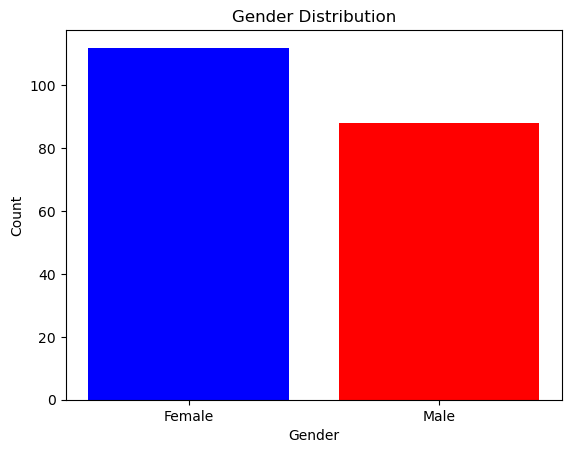

In [11]:
plt.bar(Gender_count.index, Gender_count.values, color=['blue', 'red'])
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Distribution')
plt.show()

- The image shows a bar chart depicting the gender distribution, with two bars: Female (blue) and Male (red). Females outnumber Males, with approximately 112 Females and 88 Males in total.

## Distribution of Age

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


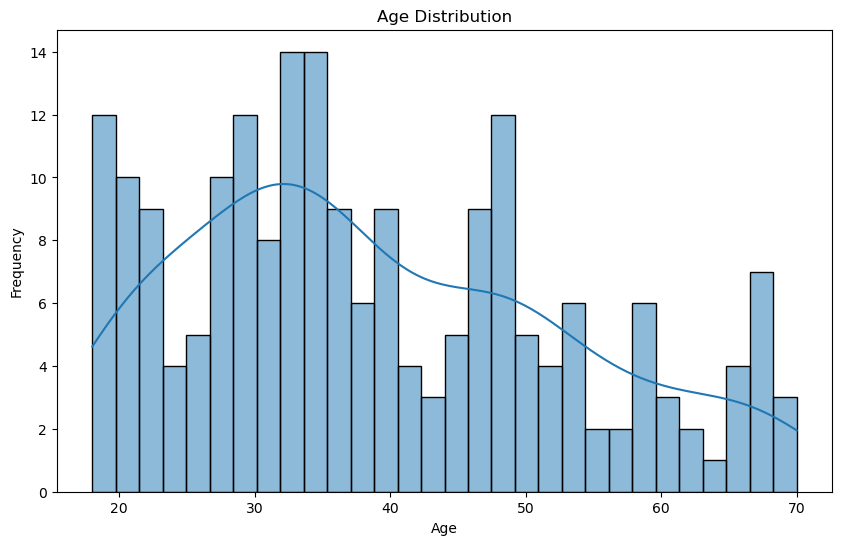

In [12]:
# Distribution of Age
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], kde=True, bins=30)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

- The image shows a histogram of age distribution with a density curve. Ages range from 20 to 70, with the highest frequency around 30 and 50 years, gradually decreasing with age.

In [13]:
sorted_age = {
    tuple(i for i in range(18, 29)): "18-28",
    tuple(i for i in range(29, 40)): "29-39",
    tuple(i for i in range(40, 51)): "40-50",
    tuple(i for i in range(51, 62)): "51-61",
    tuple(i for i in range(62, 71)): "62-70"
}
Age_pct= df['Age'].replace(sorted_age)

In [14]:
df['Age_group'] = Age_pct
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Age_group
0,1,Male,19,15,39,18-28
1,2,Male,21,15,81,18-28
2,3,Female,20,16,6,18-28
3,4,Female,23,16,77,18-28
4,5,Female,31,17,40,29-39
...,...,...,...,...,...,...
195,196,Female,35,120,79,29-39
196,197,Female,45,126,28,40-50
197,198,Male,32,126,74,29-39
198,199,Male,32,137,18,29-39


<Axes: title={'center': 'Age Group for our Mall Customer'}, xlabel='Age Group', ylabel='Frequency'>

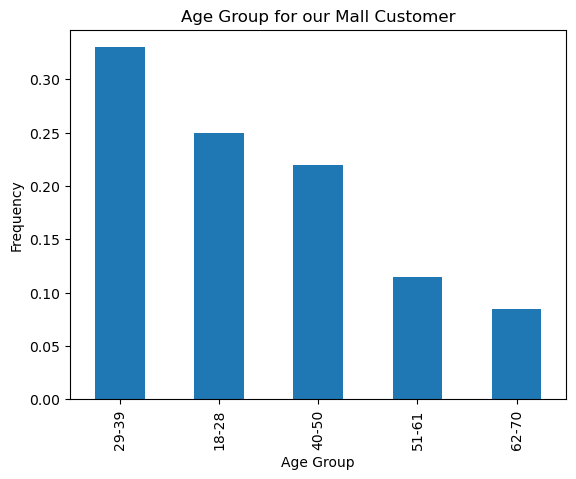

In [15]:
df['Age_group'].value_counts(normalize=True).plot(
        kind="bar",
        xlabel="Age Group",
        ylabel="Frequency",
        title = "Age Group for our Mall Customer"
)

- - The bar chart illustrates age group distribution for mall customers. The largest group Age is 29-39 (over 30%), followed by 18-28 and 40-50. Smaller proportions are in the 51-61 and 62-70 ranges.

## Annual Income (k$)

In [16]:
sorted_Income = {
    tuple(i for i in range(0, 21)): "Under 20k",
    tuple(i for i in range(21, 44)): "21-43k",
    tuple(i for i in range(44, 50)): "44-49k",
    tuple(i for i in range(50, 66)): "50-65k",
    tuple(i for i in range(66, 87)): "66-86k",
    tuple(i for i in range(87, 138)): "Above 87k"
}

In [17]:
income = df['Annual Income (k$)'].replace(sorted_Income)

In [18]:
df['Income_group (Range)']= income
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Age_group,Income_group (Range)
0,1,Male,19,15,39,18-28,Under 20k
1,2,Male,21,15,81,18-28,Under 20k
2,3,Female,20,16,6,18-28,Under 20k
3,4,Female,23,16,77,18-28,Under 20k
4,5,Female,31,17,40,29-39,Under 20k


<Axes: title={'center': 'Annual Income Groups for our Mall Customer'}, xlabel='Annual Income', ylabel='Frequency'>

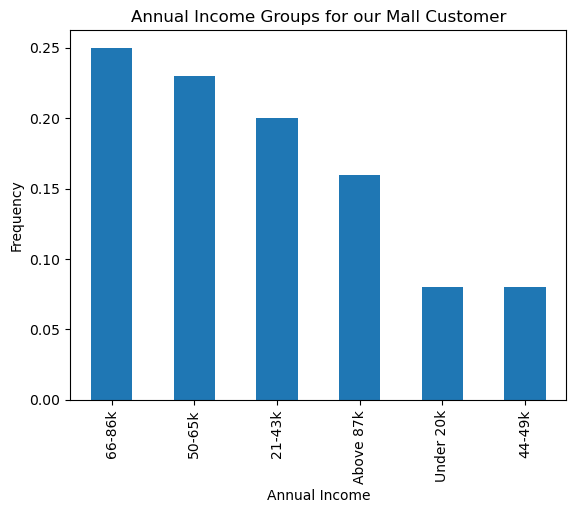

In [19]:
df['Income_group (Range)'].value_counts(normalize=True).plot(
        kind="bar",
        xlabel="Annual Income",
        ylabel="Frequency",
        title = "Annual Income Groups for our Mall Customer"
)

- The bar chart illustrates age group distribution for mall customers. The largest group Annual Income is 66-68 (over 25%), followed by under 20k and 44-49k. Smaller proportions.

## Spending Score

In [20]:
sorted_Score = {
    tuple(i for i in range(0, 21)): "Under 20",
    tuple(i for i in range(21, 41)): "21-40",
    tuple(i for i in range(41, 61)): "41-60",
    tuple(i for i in range(61, 81)): "61-80",
    tuple(i for i in range(81, 101)): "81-100"
}

In [21]:
Spending_score = df['Spending Score (1-100)'].replace(sorted_Score)
df['Spending_score (Range)']=Spending_score
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Age_group,Income_group (Range),Spending_score (Range)
0,1,Male,19,15,39,18-28,Under 20k,21-40
1,2,Male,21,15,81,18-28,Under 20k,81-100
2,3,Female,20,16,6,18-28,Under 20k,Under 20
3,4,Female,23,16,77,18-28,Under 20k,61-80
4,5,Female,31,17,40,29-39,Under 20k,21-40


<Axes: title={'center': 'Spending Score Groups for our Mall Customer'}, xlabel='Spending Score', ylabel='Frequency'>

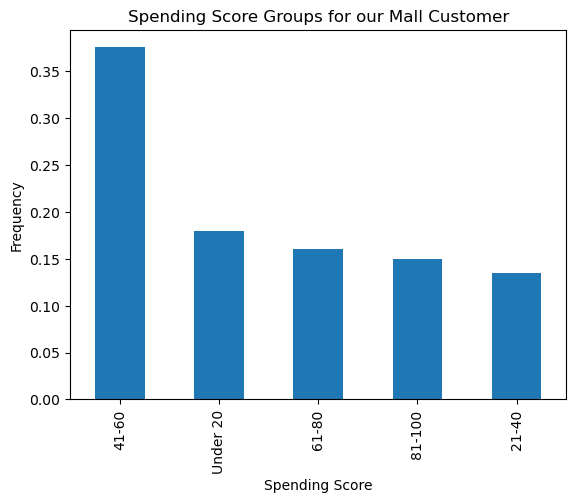

In [22]:
df['Spending_score (Range)'].value_counts(normalize=True).plot(
        kind="bar",
        xlabel="Spending Score",
        ylabel="Frequency",
        title = "Spending Score Groups for our Mall Customer"
)

- The bar chart illustrates age group distribution for mall customers. The largest group Spending Score is 41-60 (over 40%), followed by under 20. Smaller proportions are in the 81-100 and 21-40 ranges.

In [23]:
df["Target Customers"] = df['Spending Score (1-100)'].apply(lambda x: 1 if x > 40 else 0)
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Age_group,Income_group (Range),Spending_score (Range),Target Customers
0,1,Male,19,15,39,18-28,Under 20k,21-40,0
1,2,Male,21,15,81,18-28,Under 20k,81-100,1
2,3,Female,20,16,6,18-28,Under 20k,Under 20,0
3,4,Female,23,16,77,18-28,Under 20k,61-80,1
4,5,Female,31,17,40,29-39,Under 20k,21-40,0


In [24]:
df['Target Customers'].value_counts()

Target Customers
1    137
0     63
Name: count, dtype: int64

## Gender 

In [25]:
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Age_group,Income_group (Range),Spending_score (Range),Target Customers
0,1,1,19,15,39,18-28,Under 20k,21-40,0
1,2,1,21,15,81,18-28,Under 20k,81-100,1
2,3,0,20,16,6,18-28,Under 20k,Under 20,0
3,4,0,23,16,77,18-28,Under 20k,61-80,1
4,5,0,31,17,40,29-39,Under 20k,21-40,0


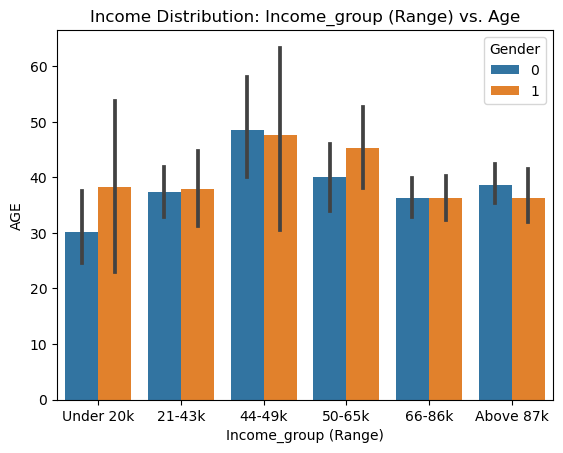

In [26]:
sns.barplot(
    x="Income_group (Range)",
    y="Age",
    hue = "Gender",
    data=df,
)
plt.xlabel("Income_group (Range)")
plt.ylabel("AGE")
plt.title("Income Distribution: Income_group (Range) vs. Age");

- The bar chart displays the relationship between age and income groups, segmented by gender. The blue bars represent males (1) and the orange bars represent females (0). The age distribution varies across income ranges, with males generally showing a wider age range and higher age variability than Males, especially in the 44-49k rang

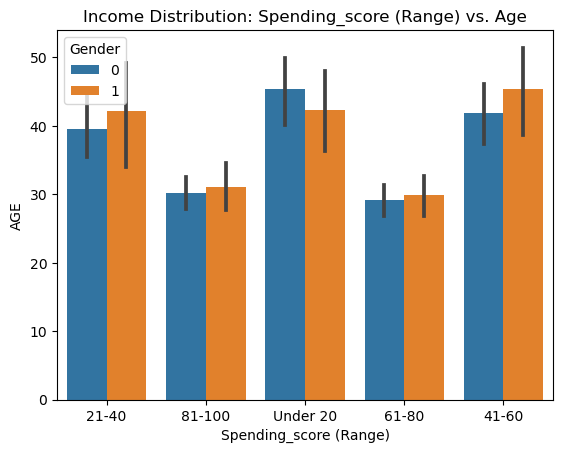

In [27]:
sns.barplot(
    x="Spending_score (Range)",
    y="Age",
    hue = "Gender",
    data=df
)
plt.xlabel("Spending_score (Range)")
plt.ylabel("AGE")
plt.title("Income Distribution: Spending_score (Range) vs. Age");

- This bar chart shows age distribution across spending score ranges, where males are represented by orange (1) and females by blue (0). Males have higher age variability, especially in the "Under 20" and "41-60" ranges, while females display more consistent age patterns across all spending score ranges.

In [28]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Age_group,Income_group (Range),Spending_score (Range),Target Customers
0,1,1,19,15,39,18-28,Under 20k,21-40,0
1,2,1,21,15,81,18-28,Under 20k,81-100,1
2,3,0,20,16,6,18-28,Under 20k,Under 20,0
3,4,0,23,16,77,18-28,Under 20k,61-80,1
4,5,0,31,17,40,29-39,Under 20k,21-40,0


In [29]:
income_distribution = df.groupby('Spending_score (Range)').sum()
income_distribution

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Age_group,Income_group (Range),Target Customers
Spending_score (Range),,,,,,,,
21-40,2763,7,1087,1658,876,18-2829-3929-3951-6129-3940-5040-5029-3962-704...,Under 20kUnder 20k21-43k21-43k21-43k21-43k21-4...,0
41-60,6329,32,3255,4094,3761,40-5018-2829-3929-3940-5029-3929-3951-6140-504...,21-43k21-43k21-43k21-43k21-43k21-43k21-43k21-4...,75
61-80,3222,13,944,1908,2317,18-2818-2829-3918-2818-2818-2818-2829-3929-391...,Under 20kUnder 20kUnder 20kUnder 20kUnder 20k2...,32
81-100,3648,14,918,2072,2693,18-2818-2829-3929-3929-3918-2818-2818-2818-282...,Under 20kUnder 20kUnder 20k21-43k21-43k21-43k2...,30
Under 20,4138,22,1566,2380,393,18-2829-3962-7062-7051-6129-3940-5051-6151-615...,Under 20kUnder 20kUnder 20kUnder 20kUnder 20kU...,0


## Spending_score (Range)

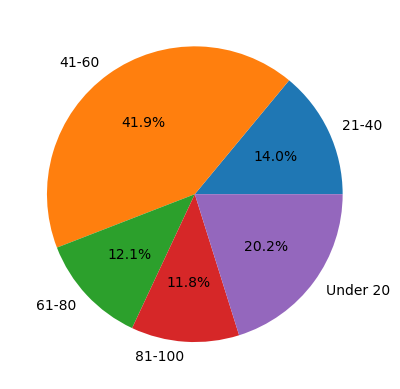

In [30]:
plt.pie(
    income_distribution['Age'],
    labels=income_distribution.index,
    autopct='%1.1f%%',
);

##  Income distribution

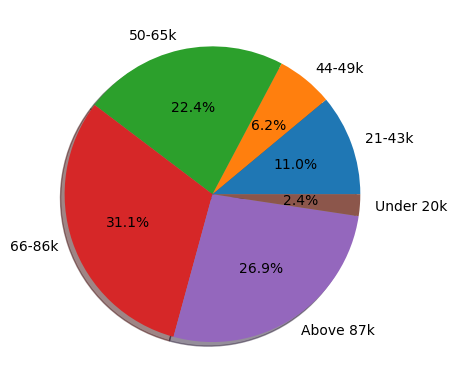

In [31]:
age_distribution = df.groupby('Income_group (Range)').sum()
age_distribution
plt.pie(
    age_distribution['Annual Income (k$)'],
    labels=age_distribution.index,
    autopct='%1.1f%%',
    shadow=True
);

- 

C:\Users\Administrator\AppData\Local\Temp\ipykernel_8112\1154144886.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[x] , bins = 20)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Administrator\AppData\Local\Temp\ipykernel_8112\1154144886.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with


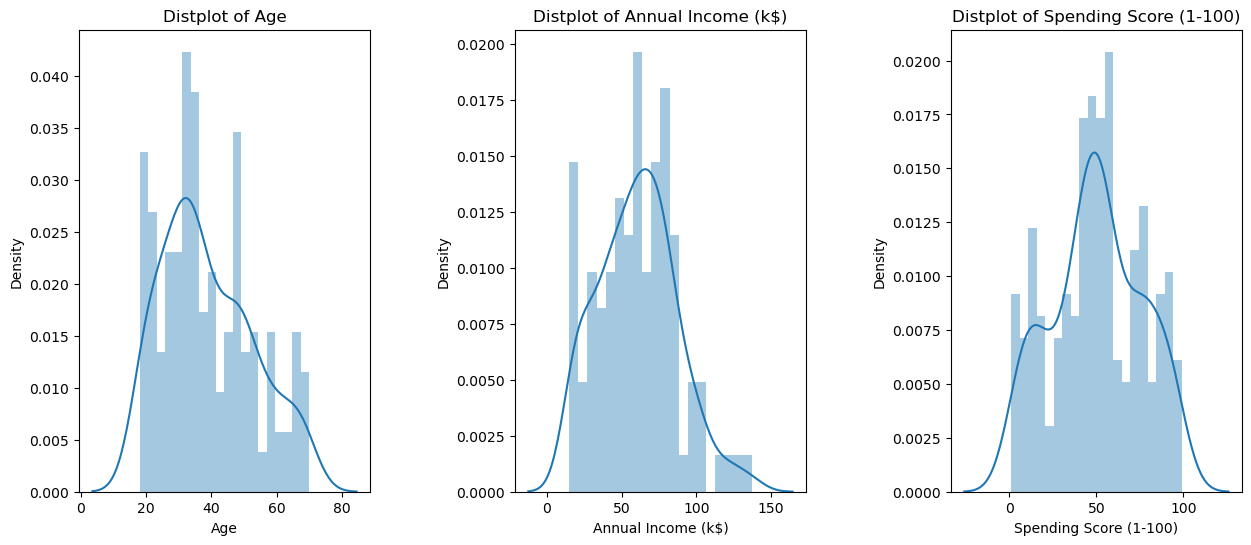

In [32]:
plt.figure(1 , figsize = (15 , 6))
n = 0 
for x in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
    sns.distplot(df[x] , bins = 20)
    plt.title('Distplot of {}'.format(x))
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

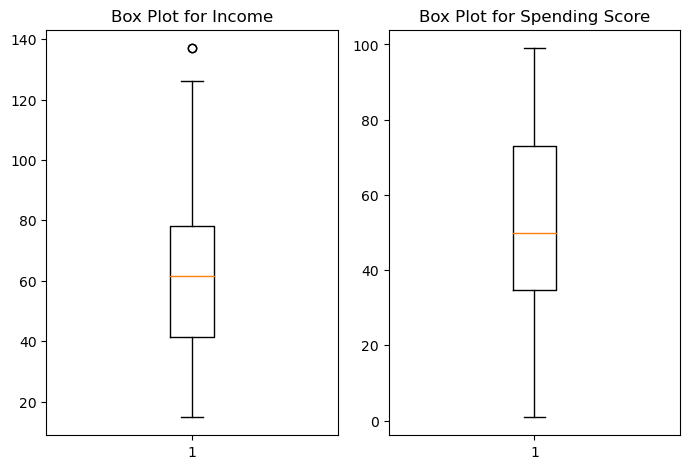

In [33]:
fig = plt.figure(figsize=(7,9))
ax1 = fig.add_subplot(2,2,1)
ax1.boxplot(df['Annual Income (k$)'])
ax1.set_title('Box Plot for Income')

ax2 = fig.add_subplot(2,2,2)
ax2.boxplot(df['Spending Score (1-100)'])
ax2.set_title('Box Plot for Spending Score')
plt.tight_layout()
plt.show

- NO outlire in data columns Income and Spending Score

In [34]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Age_group,Income_group (Range),Spending_score (Range),Target Customers
0,1,1,19,15,39,18-28,Under 20k,21-40,0
1,2,1,21,15,81,18-28,Under 20k,81-100,1
2,3,0,20,16,6,18-28,Under 20k,Under 20,0
3,4,0,23,16,77,18-28,Under 20k,61-80,1
4,5,0,31,17,40,29-39,Under 20k,21-40,0


In [35]:
# plt.figure(figsize=(8, 15))
# sns.pairplot(df['CustomerID', 'Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'])

# Split

In [36]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Age_group,Income_group (Range),Spending_score (Range),Target Customers
0,1,1,19,15,39,18-28,Under 20k,21-40,0
1,2,1,21,15,81,18-28,Under 20k,81-100,1
2,3,0,20,16,6,18-28,Under 20k,Under 20,0
3,4,0,23,16,77,18-28,Under 20k,61-80,1
4,5,0,31,17,40,29-39,Under 20k,21-40,0


In [37]:
df.drop(columns= ['CustomerID', 'Age_group', 'Income_group (Range)', 'Spending_score (Range)', 'Target Customers'], axis=1, inplace= True)

In [38]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


In [39]:
X = df.copy()

In [40]:
print("X type:", type(X))
print("X shape:", X.shape)
X.head()

X type: <class 'pandas.core.frame.DataFrame'>
X shape: (200, 4)


,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


In [41]:
X_Summary = X.aggregate(["mean","std"]).astype(int)
X_Summary

,Gender,Age,Annual Income (k$),Spending Score (1-100)
mean,0,38,60,50
std,0,13,26,25


## Correlation Heatmap

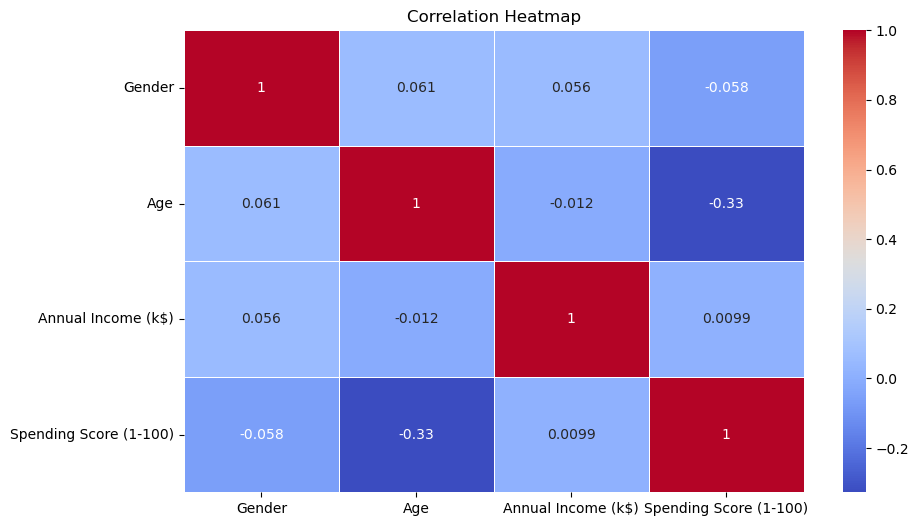

In [42]:
import numpy as np
numeric_df = X.select_dtypes(include=[np.number])
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

## Build Model

In [45]:
#!pip install pycaret

## Standardize the data

In [46]:
# # Standardize the data
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# X[['Annual Income (k$)', 'Spending Score (1-100)']]=scaler.fit_transform(X[['Annual Income (k$)', 'Spending Score (1-100)']])
# X

## Normalizing the data

In [47]:
# # Normalizing the data
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# X[['Annual Income (k$)', 'Spending Score (1-100)']] = scaler.fit_transform(X[['Annual Income (k$)', 'Spending Score (1-100)']])
# X

In [48]:
from pycaret.classification import compare_models

In [49]:
from pycaret.clustering import *


In [50]:
cluster1= setup(data = X)

,Description,Value
0,Session id,6362
1,Original data shape,"(200, 4)"
2,Transformed data shape,"(200, 4)"
3,Numeric features,4
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


In [51]:
models()

,Name,Reference
ID,,
kmeans,K-Means Clustering,sklearn.cluster._kmeans.KMeans
ap,Affinity Propagation,sklearn.cluster._affinity_propagation.Affinity...
meanshift,Mean Shift Clustering,sklearn.cluster._mean_shift.MeanShift
sc,Spectral Clustering,sklearn.cluster._spectral.SpectralClustering
hclust,Agglomerative Clustering,sklearn.cluster._agglomerative.AgglomerativeCl...
dbscan,Density-Based Spatial Clustering,sklearn.cluster._dbscan.DBSCAN
optics,OPTICS Clustering,sklearn.cluster._optics.OPTICS
birch,Birch Clustering,sklearn.cluster._birch.Birch


In [52]:
kmeans = create_model('kmeans', num_clusters=5)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4402,150.6053,0.8272,0,0,0


In [53]:
meanshift = create_model('dbscan')

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0,0,0,0,0,0


In [54]:
hclust = create_model('hclust')

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4102,124.2458,0.8333,0,0,0


In [55]:
# from pycaret.classification import setup, compare_models
# best_model = compare_models()

In [56]:
# Plot the K-Means clusters
plot_model(kmeans, plot='cluster')

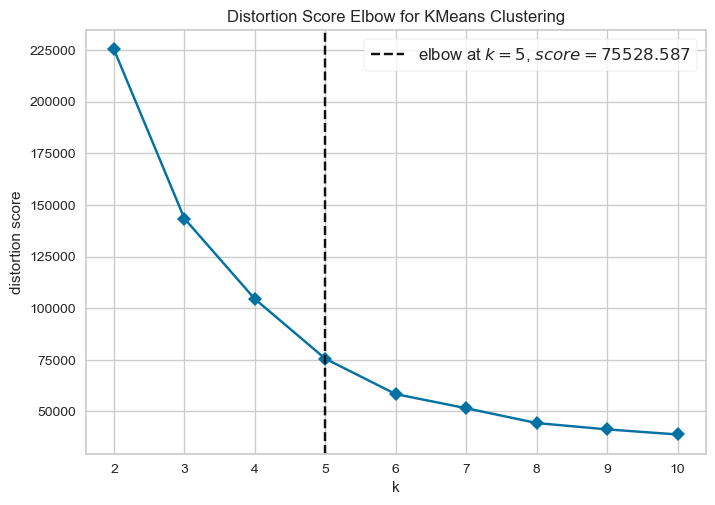

In [57]:
plot_model(kmeans, plot = 'elbow')

In [58]:
evaluate_model(kmeans)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [59]:
# Assign cluster labels to the data
clustered_data = assign_model(kmeans)
clustered_data = pd.DataFrame(clustered_data)

In [60]:
# View the data with cluster labels
print(clustered_data.head())


   Gender  Age  Annual Income (k$)  Spending Score (1-100)    Cluster
0       1   19                  15                      39  Cluster 4
1       1   21                  15                      81  Cluster 3
2       0   20                  16                       6  Cluster 4
3       0   23                  16                      77  Cluster 3
4       0   31                  17                      40  Cluster 4


In [61]:
import pandas as pd
clustered_data.to_csv("kmean_cluster.csv")
print("Result File saved")

Result File saved


## 1. Grid Search for KMeans Hyperparameter Optimization

In [62]:
!pip install my_module

In [63]:
from pycaret.classification import setup, compare_models, create_model, tune_model, finalize_model, evaluate_model


In [64]:
import pycaret
from pycaret.clustering import *

exp = setup(X)

kmeans_params = {
    'n_clusters': [3, 5, 7, 10],  # Example values for the number of clusters
    'init': ['k-means++', 'random'],  # Initialization methods
    'max_iter': [300, 500],  # Number of iterations
    'n_init': [10, 20]  # Number of times the k-means algorithm will be run
}

# Perform grid search
# kmeans_model = create_model('kmeans')
# tuned_kmeans = tune_model(kmeans_model, optimize='silhouette', custom_grid=kmeans_params)

# # Evaluate the tuned model
# evaluate_model(tuned_kmeans)

,Description,Value
0,Session id,4652
1,Original data shape,"(200, 4)"
2,Transformed data shape,"(200, 4)"
3,Numeric features,4
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


In [65]:
from sklearn.model_selection import GridSearchCV
from sklearn.cluster import KMeans

param_grid = {
    'n_clusters': [3, 4, 5, 6, 7],
    'init': ['k-means++', 'random'],
    'n_init': [10, 20],
    'max_iter': [300, 500]
}

kmeans = KMeans()
grid_search = GridSearchCV(estimator=kmeans, param_grid=param_grid, cv=5)
grid_search.fit(X)

print("Best Parameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)

Best Parameters:  {'init': 'k-means++', 'max_iter': 500, 'n_clusters': 7, 'n_init': 10}
Best Score:  -30245.426507121498
